### TF-IDF is Term Frequency-Inverse Document frequency which is used to get the count of each value in a document.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score 

In [2]:
docs=pd.read_csv('sms_spam.csv',sep=',')

### Exploratory Data Analysis

In [3]:
docs.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
docs.describe()

,type,text
count,5574,5574
unique,2,5160
top,ham,"Sorry, I'll call later"
freq,4827,30


In [5]:
docs[docs.text=="Sorry, I'll call later"].head(5)

,type,text
80,ham,"Sorry, I'll call later"
223,ham,"Sorry, I'll call later"
339,ham,"Sorry, I'll call later"
444,ham,"Sorry, I'll call later"
702,ham,"Sorry, I'll call later"


### Get Length of each document

In [6]:
docs['text_length']=docs['text'].apply(len)
docs.head(5)

,type,text,text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [7]:
docs['text_length'].plot(bins=50,kind='hist')

In [8]:
count_asc=[docs['text_length'].sort_values(ascending=False)]


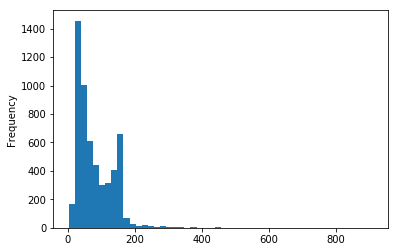

In [9]:
docs['text_length'].plot(kind='hist',bins=50)

In [10]:
X=docs.iloc[:,1].values

In [11]:
y=docs.iloc[:,0].values

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

### Count Vectorizer will count words


In [13]:
word_count=CountVectorizer(stop_words='english')
count=word_count.fit_transform(X_train)
count

<4459x7463 sparse matrix of type '<class 'numpy.int64'>'
	with 34695 stored elements in Compressed Sparse Row format>

### TF-IDF Conversion

In [14]:
tf_idf=TfidfTransformer()
tf_idf.fit_transform(count)

<4459x7463 sparse matrix of type '<class 'numpy.float64'>'
	with 34695 stored elements in Compressed Sparse Row format>

In [15]:
words=pd.DataFrame(tf_idf.idf_,index=word_count.get_feature_names(),columns=['idf_weights'])

In [16]:
words.sort_values(by='idf_weights',ascending=False).head(10)

,idf_weights
〨ud,8.709757
lately,8.709757
law,8.709757
lavender,8.709757
laurie,8.709757
laundry,8.709757
laughs,8.709757
latests,8.709757
latelyxxx,8.709757
lasting,8.709757


### Naive-Bayes for Ham(Not-Spam) or Spam filtering

In [17]:
naive_bayes=MultinomialNB()

In [18]:
naive_bayes.fit(count,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
X_test_count=word_count.transform(X_test)

In [20]:
X_test_count

<1115x7463 sparse matrix of type '<class 'numpy.int64'>'
	with 7836 stored elements in Compressed Sparse Row format>

### Predict on the test set of data

In [21]:
y_pred=naive_bayes.predict(X_test_count)


In [22]:
type(y_pred)

numpy.ndarray

In [23]:
type(y_test)

numpy.ndarray

In [24]:
y_test=pd.DataFrame(y_test,columns=['y_test'])
y_pred=pd.DataFrame(y_pred,columns=['y_pred'])

### Concat test and predicted results

In [25]:
result_test_pred=pd.concat([y_test,y_pred],axis=1)

In [26]:
result_test_pred[result_test_pred.y_test !=result_test_pred.y_pred]

,y_test,y_pred
300,spam,ham
308,ham,spam
366,spam,ham
412,ham,spam
524,spam,ham
562,spam,ham
612,spam,ham
696,ham,spam
780,spam,ham
789,ham,spam


In [27]:
final_result=pd.concat([docs,result_test_pred],axis=1)
final_result.head()

,type,text,text_length,y_test,y_pred
0,ham,"Go until jurong point, crazy.. Available only ...",111,ham,ham
1,ham,Ok lar... Joking wif u oni...,29,ham,ham
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,ham,ham
3,ham,U dun say so early hor... U c already then say...,49,ham,ham
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,ham,ham


### Accuracy score of Model

In [28]:
accuracy_score(y_test,y_pred)

0.9847533632286996